<a href="https://colab.research.google.com/github/Arijitdutta19910601/Atmol4Cast-CNR/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
! pip install verstack cartopy xarray openpyxl DateTime pandas numpy matplotlib tensorflow keras scipy

In [6]:
import pandas as pd
import numpy as np

# --- Load ZephIR Wind Lidar Data ---
zephir_df = pd.read_excel('/content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/Wind_Lidar_Combined_with_h7_std.xlsx')
Test_df = zephir_df[['Timestamp', "h_1_horizontal_speed", "h_2_horizontal_speed", "h_3_horizontal_speed", "h_4_horizontal_speed", "h_5_horizontal_speed", "h_6_horizontal_speed", "h_7_horizontal_speed", "h_8_horizontal_speed", "h_9_horizontal_speed", "h_10_horizontal_speed", "h_11_horizontal_speed"]].copy()
zephir_df = zephir_df[['Timestamp', "air_temperature", "air_temperature_std", "air_pressure", "air_pressure_std",
    "humidity", "humidity_std",
    "height_1", "h_1_horizontal_speed", "h_1_horizontal_speed_std", "h_1_wind_direction", "h_1_wind_direction_std",
    "h_1_vertical_speed", "h_1_vertical_speed_std",
    "height_2", "h_2_horizontal_speed", "h_2_horizontal_speed_std", "h_2_wind_direction", "h_2_wind_direction_std",
    "h_2_vertical_speed", "h_2_vertical_speed_std",
    "height_3", "h_3_horizontal_speed", "h_3_horizontal_speed_std", "h_3_wind_direction", "h_3_wind_direction_std",
    "h_3_vertical_speed", "h_3_vertical_speed_std",
    "height_4", "h_4_horizontal_speed", "h_4_horizontal_speed_std", "h_4_wind_direction", "h_4_wind_direction_std",
    "h_4_vertical_speed", "h_4_vertical_speed_std",
    "height_5", "h_5_horizontal_speed", "h_5_horizontal_speed_std", "h_5_wind_direction", "h_5_wind_direction_std",
    "h_5_vertical_speed", "h_5_vertical_speed_std",
    "height_6", "h_6_horizontal_speed", "h_6_horizontal_speed_std", "h_6_wind_direction", "h_6_wind_direction_std",
    "h_6_vertical_speed", "h_6_vertical_speed_std",
    "height_7", "h_7_horizontal_speed", "h_7_horizontal_speed_std", "h_7_wind_direction", "h_7_wind_direction_std",
    "h_7_vertical_speed", "h_7_vertical_speed_std",
    "height_8", "h_8_horizontal_speed", "h_8_horizontal_speed_std", "h_8_wind_direction", "h_8_wind_direction_std",
    "h_8_vertical_speed", "h_8_vertical_speed_std",
    "height_9", "h_9_horizontal_speed", "h_9_horizontal_speed_std", "h_9_wind_direction", "h_9_wind_direction_std",
    "h_9_vertical_speed", "h_9_vertical_speed_std",
    "height_10", "h_10_horizontal_speed", "h_10_horizontal_speed_std", "h_10_wind_direction", "h_10_wind_direction_std",
    "h_10_vertical_speed", "h_10_vertical_speed_std",
    "height_11", "h_11_horizontal_speed", "h_11_horizontal_speed_std", "h_11_wind_direction", "h_11_wind_direction_std",
    "h_11_vertical_speed", "h_11_vertical_speed_std",
    "Anno"]
].copy()
zephir_df['Timestamp'] = pd.to_datetime(zephir_df['Timestamp'])

# --- Create a common full timestamp range as a DataFrame ---
full_range_df = pd.DataFrame({'Timestamp': pd.date_range(
    start=zephir_df['Timestamp'].min(),
    end=zephir_df['Timestamp'].max(),
    freq='10min'
)})

# --- Merge both dataframes with the full timestamp range ---
Test_df = pd.merge(full_range_df, Test_df, on='Timestamp', how='left')

# Replace placeholder values with NaN
zephir_df.replace([-999, -9999], np.nan, inplace=True)
zephir_df.to_excel('/content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/ZephIR_Data_2016_2018.xlsx')

# Final structure
print(Test_df.head())


            Timestamp  h_1_horizontal_speed  h_2_horizontal_speed  \
0 2013-07-17 11:00:00                 5.896                 5.984   
1 2013-07-17 11:10:00                 5.795                 5.769   
2 2013-07-17 11:20:00                 5.743                 5.781   
3 2013-07-17 11:30:00                 4.751                 4.991   
4 2013-07-17 11:40:00                 4.953                 4.983   

   h_3_horizontal_speed  h_4_horizontal_speed  h_5_horizontal_speed  \
0                 6.075                 6.154                 6.161   
1                 5.821                 5.913                 6.051   
2                 5.845                 5.968                 6.023   
3                 5.047                 5.211                 5.089   
4                 5.208                 5.077                 5.224   

   h_6_horizontal_speed  h_7_horizontal_speed  h_8_horizontal_speed  \
0                 6.181                 6.155                 6.138   
1               

In [7]:
# prompt: From zephir_df extract the tuples from Timestamp: 2016-01-13 to 2018-12-31 and create an excel file in '/content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/'

import pandas as pd
# Filter the DataFrame for the specific time period
start_datetime_filter = pd.to_datetime('2016-01-13')
end_datetime_filter = pd.to_datetime('2018-12-31')
zephir_df= zephir_df[(zephir_df['Timestamp'] >= start_datetime_filter) & (zephir_df['Timestamp'] <= end_datetime_filter)].copy()

# Define the output file path
output_file_path = '/content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/ZephIR_Data_2016_2018.xlsx'

# Save the filtered DataFrame to an Excel file
zephir_df.to_excel(output_file_path, index=False)

print(f"Filtered data saved to: {output_file_path}")

Filtered data saved to: /content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/ZephIR_Data_2016_2018.xlsx


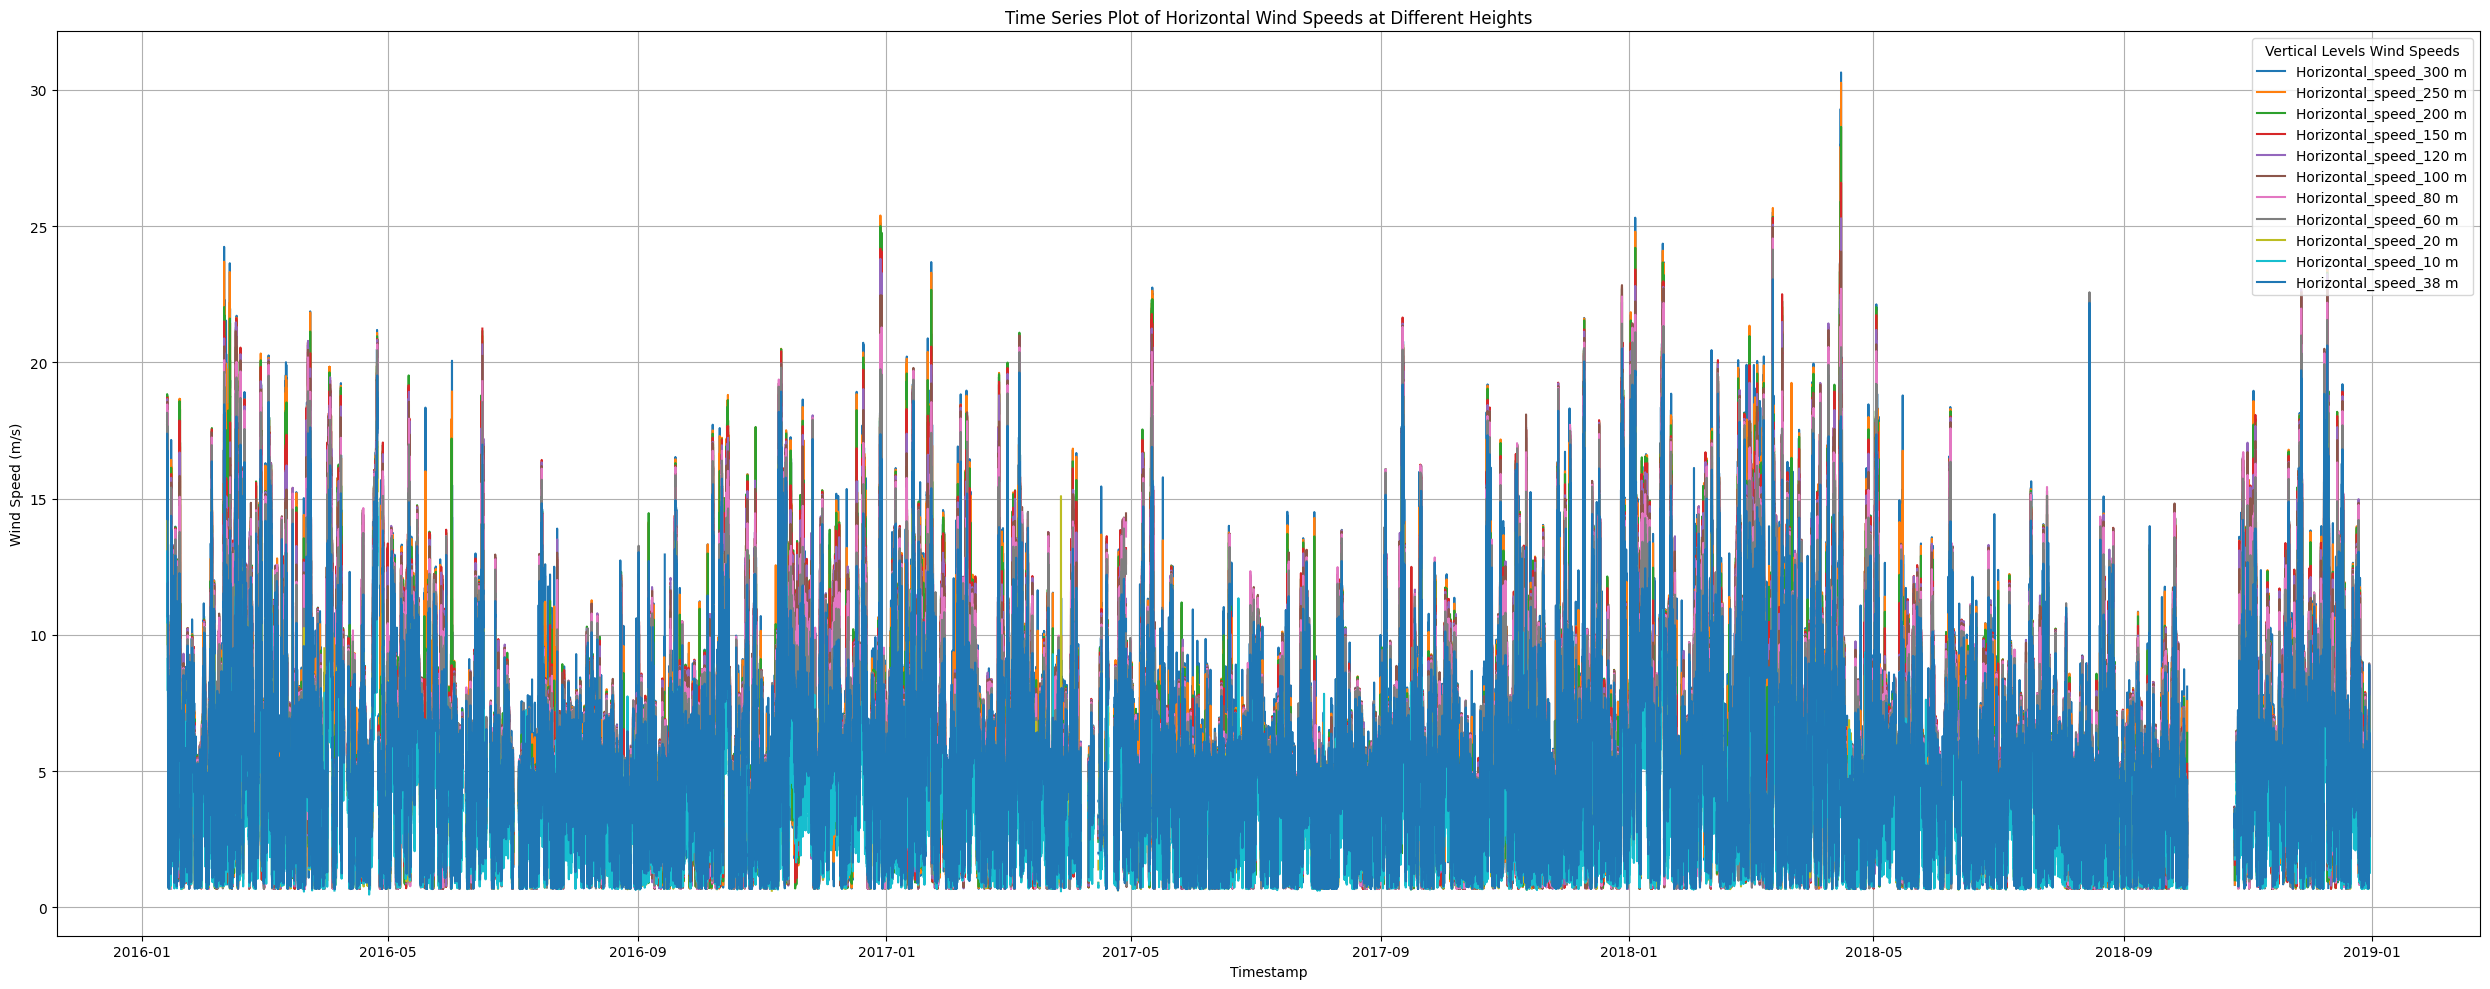

In [9]:
import matplotlib.pyplot as plt
zephir_df = pd.read_excel('/content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/ZephIR_Data_2016_2018.xlsx')
# Define column names
# These are the ORIGINAL names from the Excel file
original_columns = [
    "h_1_horizontal_speed", "h_2_horizontal_speed", "h_3_horizontal_speed",
    "h_4_horizontal_speed", "h_5_horizontal_speed", "h_6_horizontal_speed",
    "h_7_horizontal_speed", "h_8_horizontal_speed", "h_9_horizontal_speed",
    "h_10_horizontal_speed", "h_11_horizontal_speed"
]

# Define the new names after renaming
new_column_names = {
    'h_1_horizontal_speed': 'Horizontal_speed_300 m',
    'h_2_horizontal_speed': 'Horizontal_speed_250 m',
    'h_3_horizontal_speed': 'Horizontal_speed_200 m',
    'h_4_horizontal_speed': 'Horizontal_speed_150 m',
    'h_5_horizontal_speed': 'Horizontal_speed_120 m',
    'h_6_horizontal_speed': 'Horizontal_speed_100 m',
    'h_7_horizontal_speed': 'Horizontal_speed_80 m',
    'h_8_horizontal_speed': 'Horizontal_speed_60 m',
    'h_9_horizontal_speed': 'Horizontal_speed_20 m',
    'h_10_horizontal_speed': 'Horizontal_speed_10 m',
    'h_11_horizontal_speed': 'Horizontal_speed_38 m'
}

# Apply the rename operation
zephir_df.rename(columns=new_column_names, inplace=True)

# Now, create the list of columns to plot using the NEW names
columns_to_plot = list(new_column_names.values())

# Plot
plt.figure(figsize=(25, 10))

# Iterate over the NEW column names for plotting
for col in columns_to_plot:
    # Ensure the column exists in the DataFrame after renaming
    if col in zephir_df.columns:
         plt.plot(zephir_df['Timestamp'], zephir_df[col], label=col)
    else:
        print(f"Warning: Column '{col}' not found after renaming.")


plt.xlabel('Timestamp')
plt.ylabel('Wind Speed (m/s)')
plt.title('Time Series Plot of Horizontal Wind Speeds at Different Heights')
plt.legend(title="Vertical Levels Wind Speeds", loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


 * Initiating NaNImputer.impute
     . Dataset dimensions:
     .. rows:         155881
     .. columns:      84
     .. mb in memory: 99.9
     .. NaN cols num: 70

   - Drop hopeless NaN cols

   - Processing whole data for imputation

   - Imputing single core 70 cols
     . Imputed (regression) - 8797     NaN in air_temperature
     . Imputed (regression) - 3        NaN in air_temperature_std
     . Imputed (regression) - 8797     NaN in air_pressure
     . Imputed (regression) - 3        NaN in air_pressure_std
     . Imputed (regression) - 8797     NaN in humidity
     . Imputed (regression) - 3        NaN in humidity_std
     . Imputed (regression) - 8832     NaN in Horizontal_speed_300 m
     . Imputed (regression) - 3        NaN in h_1_horizontal_speed_std
     . Imputed (regression) - 8797     NaN in h_1_wind_direction
     . Imputed (regression) - 3        NaN in h_1_wind_direction_std
     . Imputed (regression) - 20222    NaN in h_1_vertical_speed
     . Imputed (regressi

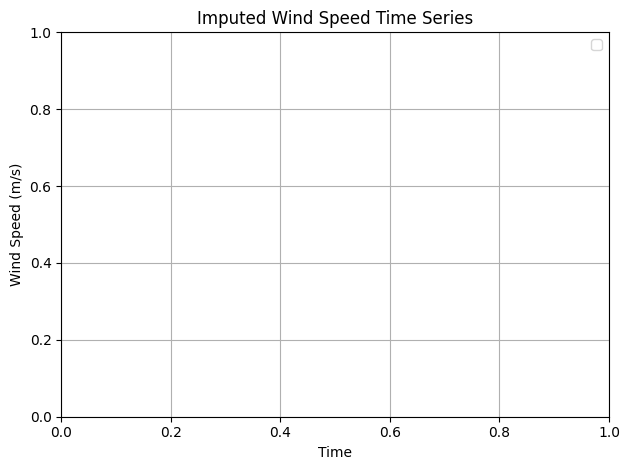

In [11]:
from verstack import NaNImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Columns to impute
# cols_to_impute = ['lidar_wind_speed', 'mast_wind_speed', 'mast_wind_direction', 'T_air[C]',	'RH[%%]', 'P_air[hPa]']
cols_to_impute = ["air_temperature", "air_temperature_std", "air_pressure", "air_pressure_std",
    "humidity", "humidity_std",
    "height_1",  'Horizontal_speed_300 m', "h_1_horizontal_speed_std", "h_1_wind_direction", "h_1_wind_direction_std",
    "h_1_vertical_speed", "h_1_vertical_speed_std",
    "height_2", 'Horizontal_speed_250 m' , "h_2_horizontal_speed_std", "h_2_wind_direction", "h_2_wind_direction_std",
    "h_2_vertical_speed", "h_2_vertical_speed_std",
    "height_3", 'Horizontal_speed_200 m', "h_3_horizontal_speed_std", "h_3_wind_direction", "h_3_wind_direction_std",
    "h_3_vertical_speed", "h_3_vertical_speed_std",
    "height_4", 'Horizontal_speed_150 m', "h_4_horizontal_speed_std", "h_4_wind_direction", "h_4_wind_direction_std",
    "h_4_vertical_speed", "h_4_vertical_speed_std",
    "height_5",'Horizontal_speed_120 m', "h_5_horizontal_speed_std", "h_5_wind_direction", "h_5_wind_direction_std",
    "h_5_vertical_speed", "h_5_vertical_speed_std",
    "height_6", 'Horizontal_speed_100 m', "h_6_horizontal_speed_std", "h_6_wind_direction", "h_6_wind_direction_std",
    "h_6_vertical_speed", "h_6_vertical_speed_std",
    "height_7", 'Horizontal_speed_80 m', "h_7_horizontal_speed_std", "h_7_wind_direction", "h_7_wind_direction_std",
    "h_7_vertical_speed", "h_7_vertical_speed_std",
    "height_8",'Horizontal_speed_60 m', "h_8_horizontal_speed_std", "h_8_wind_direction", "h_8_wind_direction_std",
    "h_8_vertical_speed", "h_8_vertical_speed_std",
    "height_9", 'Horizontal_speed_20 m', "h_9_horizontal_speed_std", "h_9_wind_direction", "h_9_wind_direction_std",
    "h_9_vertical_speed", "h_9_vertical_speed_std",
    "height_10", 'Horizontal_speed_10 m', "h_10_horizontal_speed_std", "h_10_wind_direction", "h_10_wind_direction_std",
    "h_10_vertical_speed", "h_10_vertical_speed_std",
    "height_11", 'Horizontal_speed_38 m', "h_11_horizontal_speed_std", "h_11_wind_direction", "h_11_wind_direction_std",
    "h_11_vertical_speed", "h_11_vertical_speed_std",
    "Anno"]

# Impute missing values
imputer = NaNImputer(verbose=True)
# Perform imputation and assign the result back to the specific columns
imputed_data = imputer.impute(zephir_df[cols_to_impute])
zephir_df[cols_to_impute] = imputed_data[cols_to_impute] # Explicitly select and assign columns

# Check for remaining NaNs
print("Remaining NaNs after imputation:")
print(zephir_df[cols_to_impute].isna().sum())

# Ensure Timestamp is a column, not an index
# No change needed here based on the original code
if zephir_df.index.name == 'Timestamp':
    zephir_df.reset_index(inplace=False)

# **Cleaning, Normalization, Feature Engineering (Lag Features, ETS Decomposition)**

Processing feature: Horizontal_speed_300 m
ADF Statistic for Horizontal_speed_300 m: -26.360101108560965
p-value: 0.0
Critical Value (1%): -3.4303923956954026
Critical Value (5%): -2.861558738305777
Critical Value (10%): -2.5667799737318138


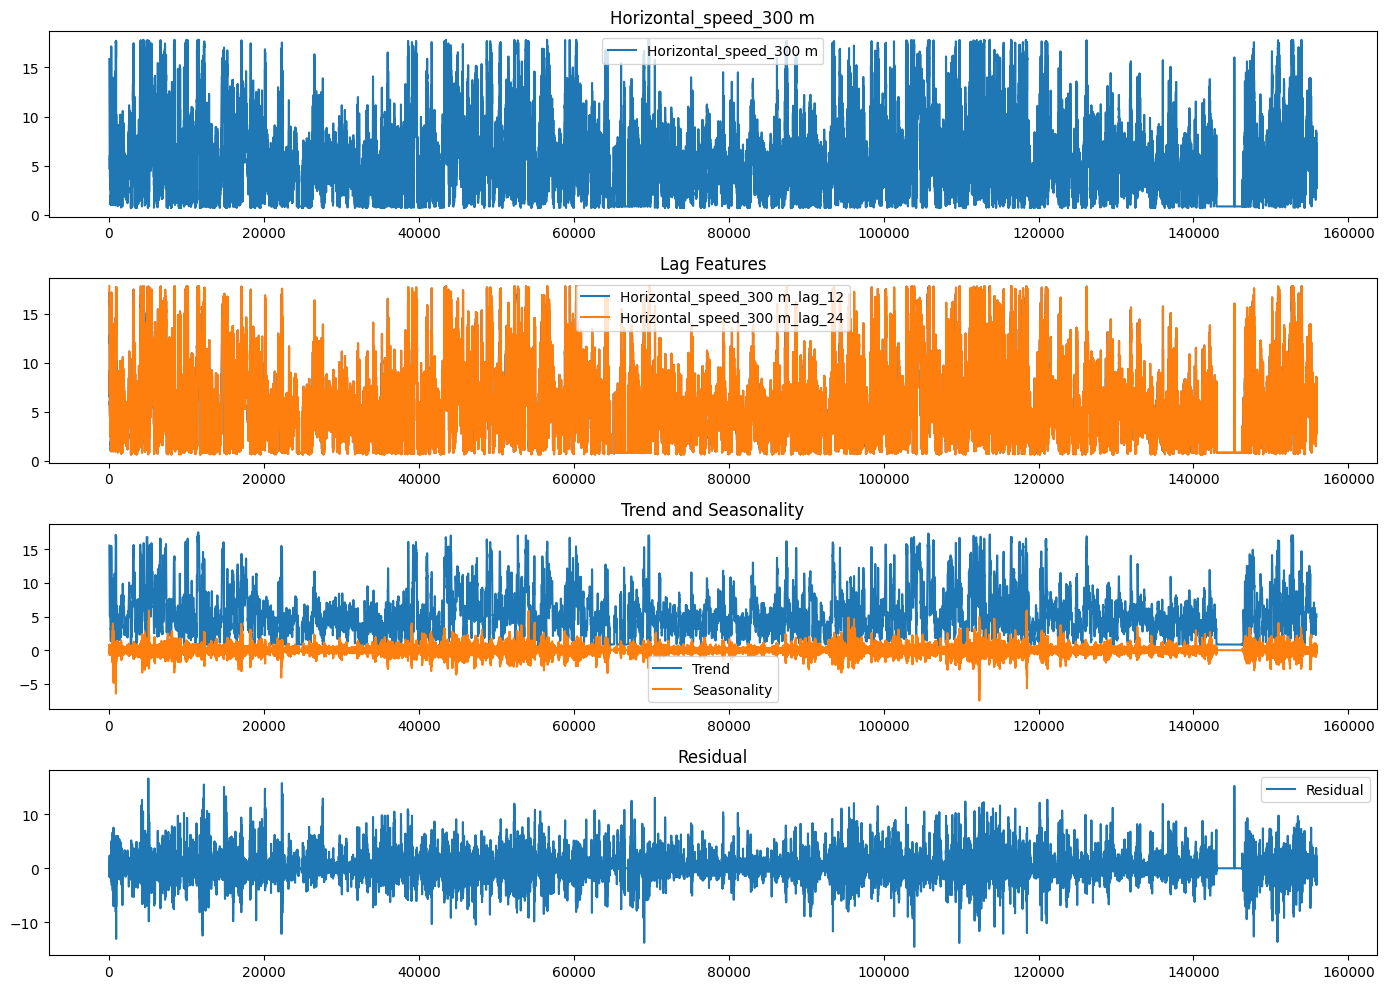

Processing feature: Horizontal_speed_250 m
ADF Statistic for Horizontal_speed_250 m: -27.13321235965013
p-value: 0.0
Critical Value (1%): -3.430392392122518
Critical Value (5%): -2.8615587367266233
Critical Value (10%): -2.5667799728912843


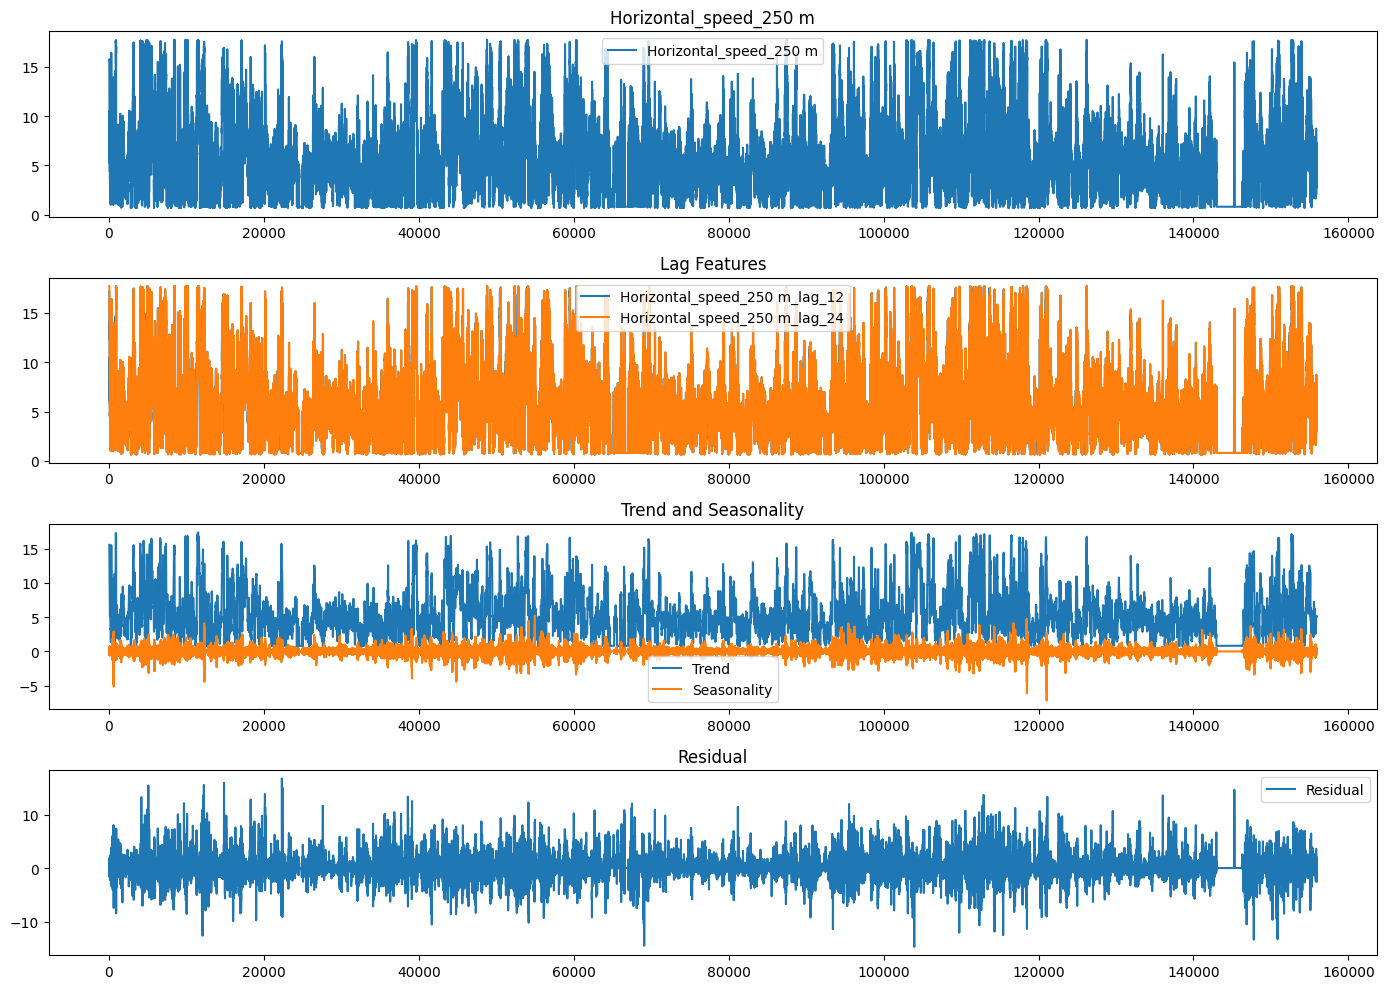

Processing feature: Horizontal_speed_200 m
ADF Statistic for Horizontal_speed_200 m: -24.677848846548162
p-value: 0.0
Critical Value (1%): -3.4303923978944004
Critical Value (5%): -2.8615587392776964
Critical Value (10%): -2.566779974249133


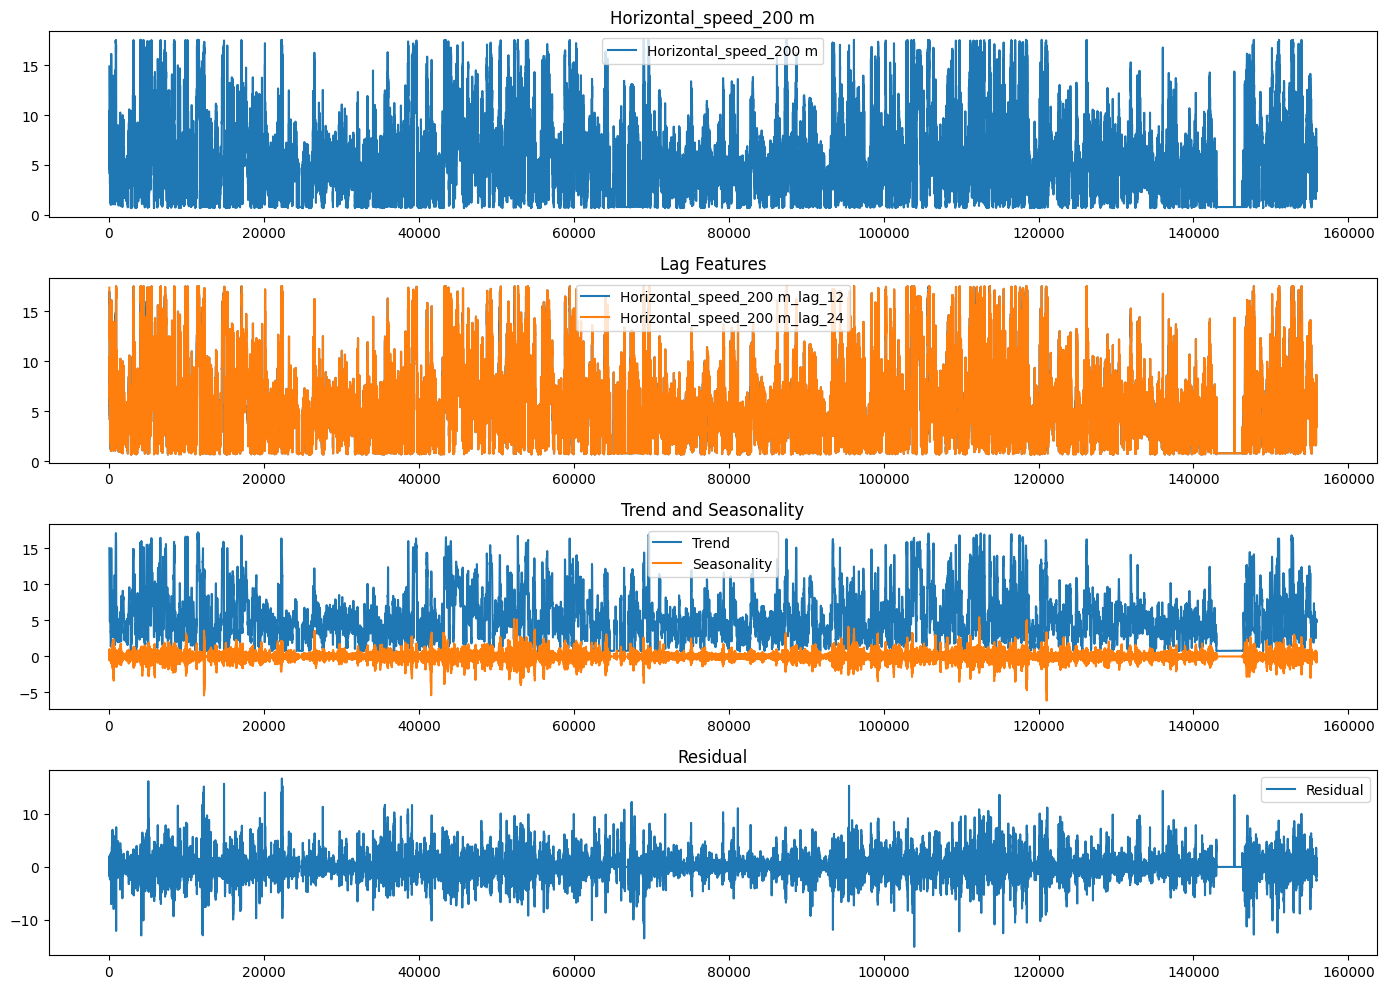

Processing feature: Horizontal_speed_150 m
ADF Statistic for Horizontal_speed_150 m: -25.4363782794722
p-value: 0.0
Critical Value (1%): -3.430392398169291
Critical Value (5%): -2.8615587393991935
Critical Value (10%): -2.5667799743138016


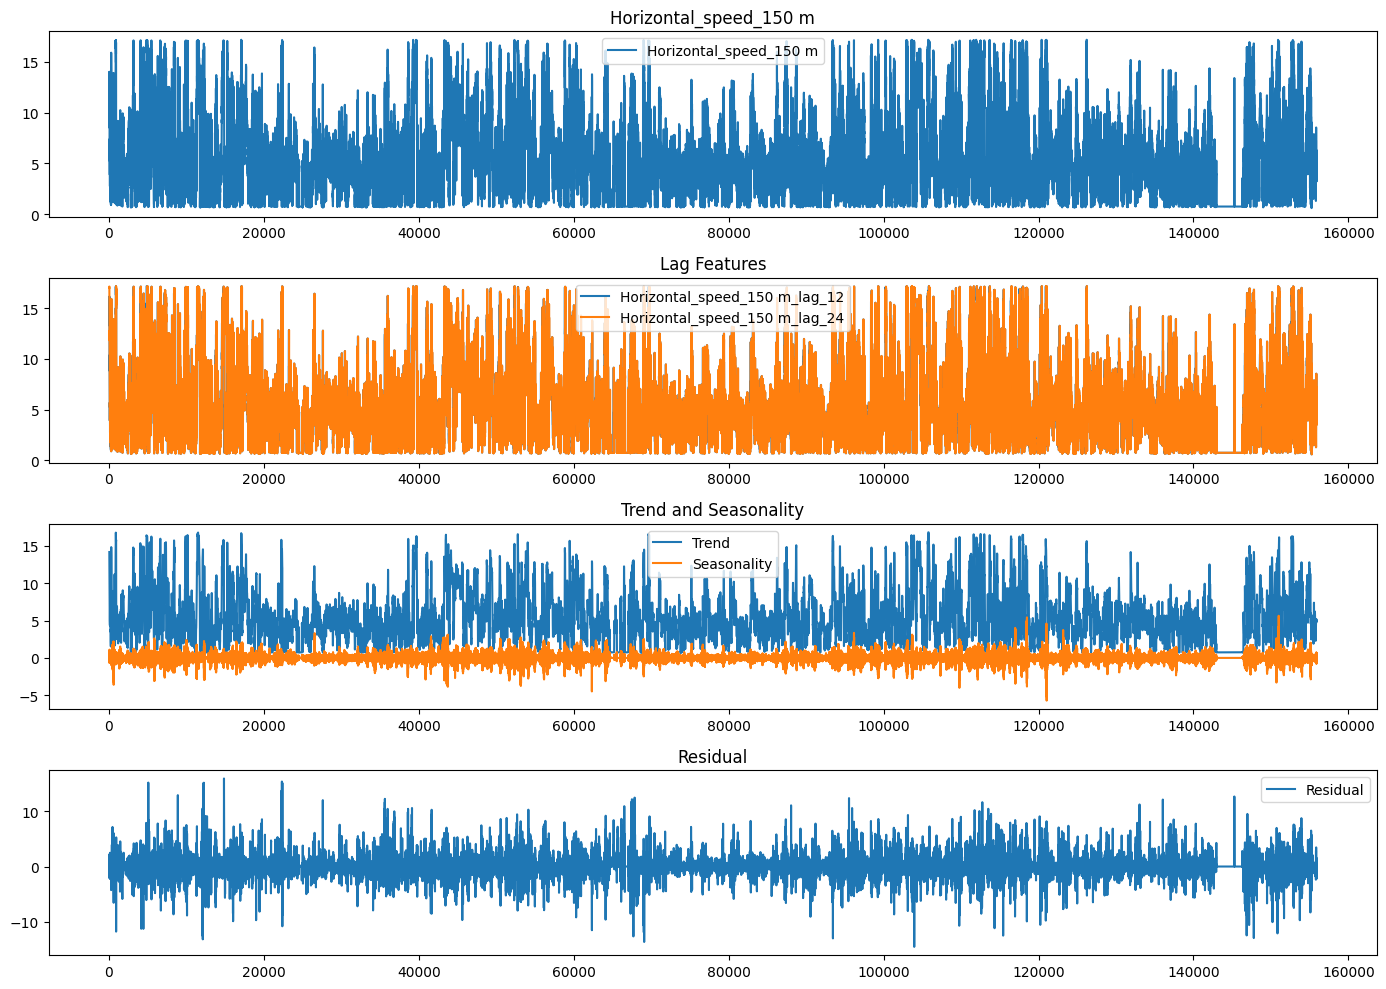

Processing feature: Horizontal_speed_120 m
ADF Statistic for Horizontal_speed_120 m: -25.46291703234157
p-value: 0.0
Critical Value (1%): -3.430392398169291
Critical Value (5%): -2.8615587393991935
Critical Value (10%): -2.5667799743138016


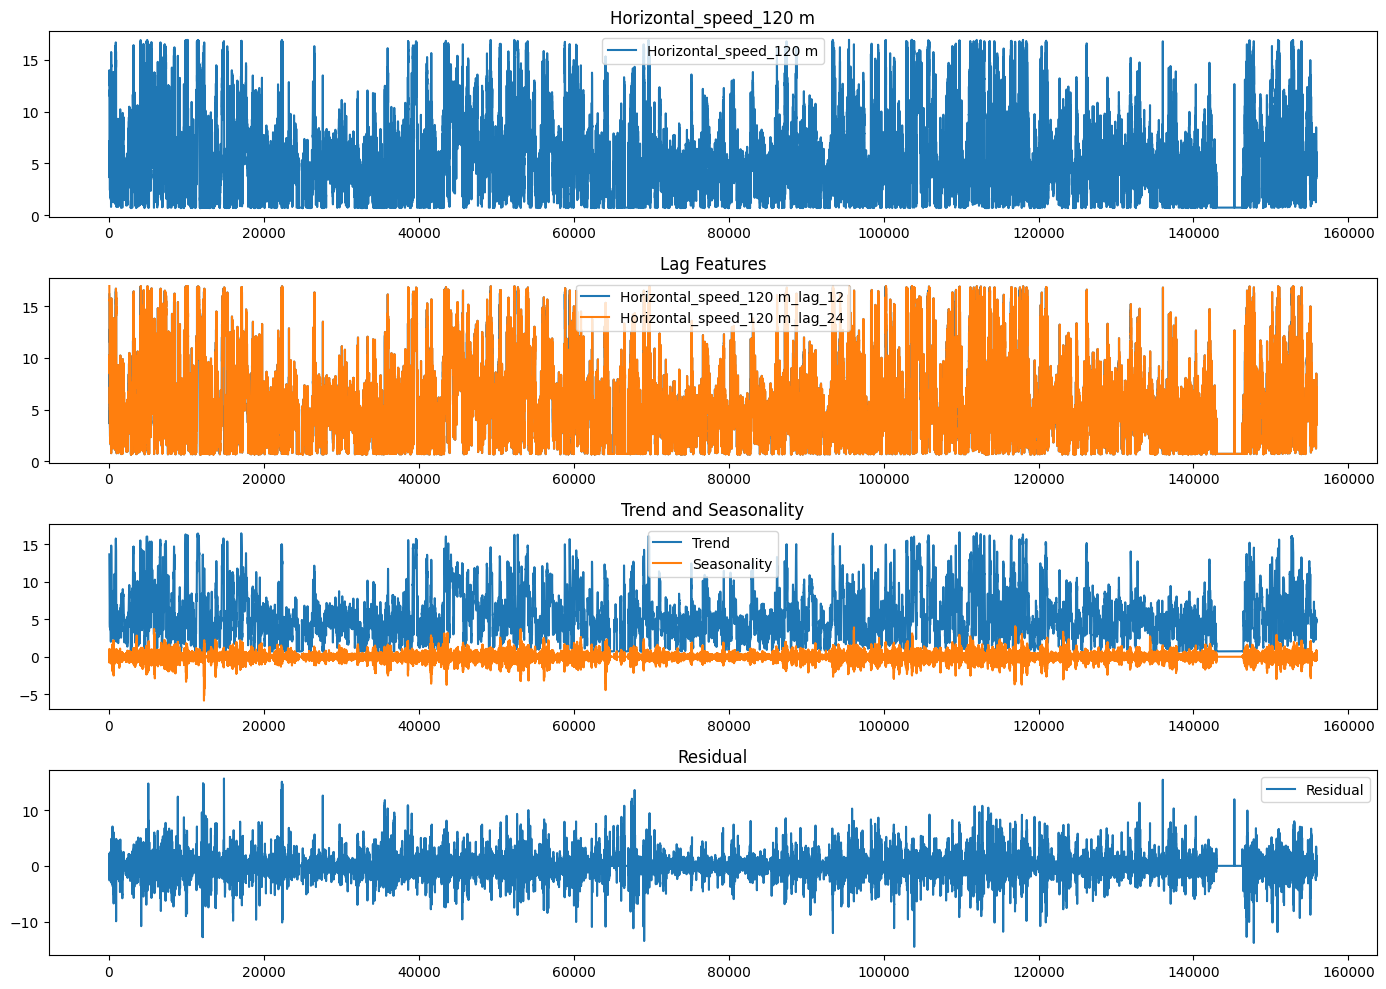

Processing feature: Horizontal_speed_100 m
ADF Statistic for Horizontal_speed_100 m: -25.3324453940611
p-value: 0.0
Critical Value (1%): -3.4303923915728967
Critical Value (5%): -2.8615587364837
Critical Value (10%): -2.5667799727619847


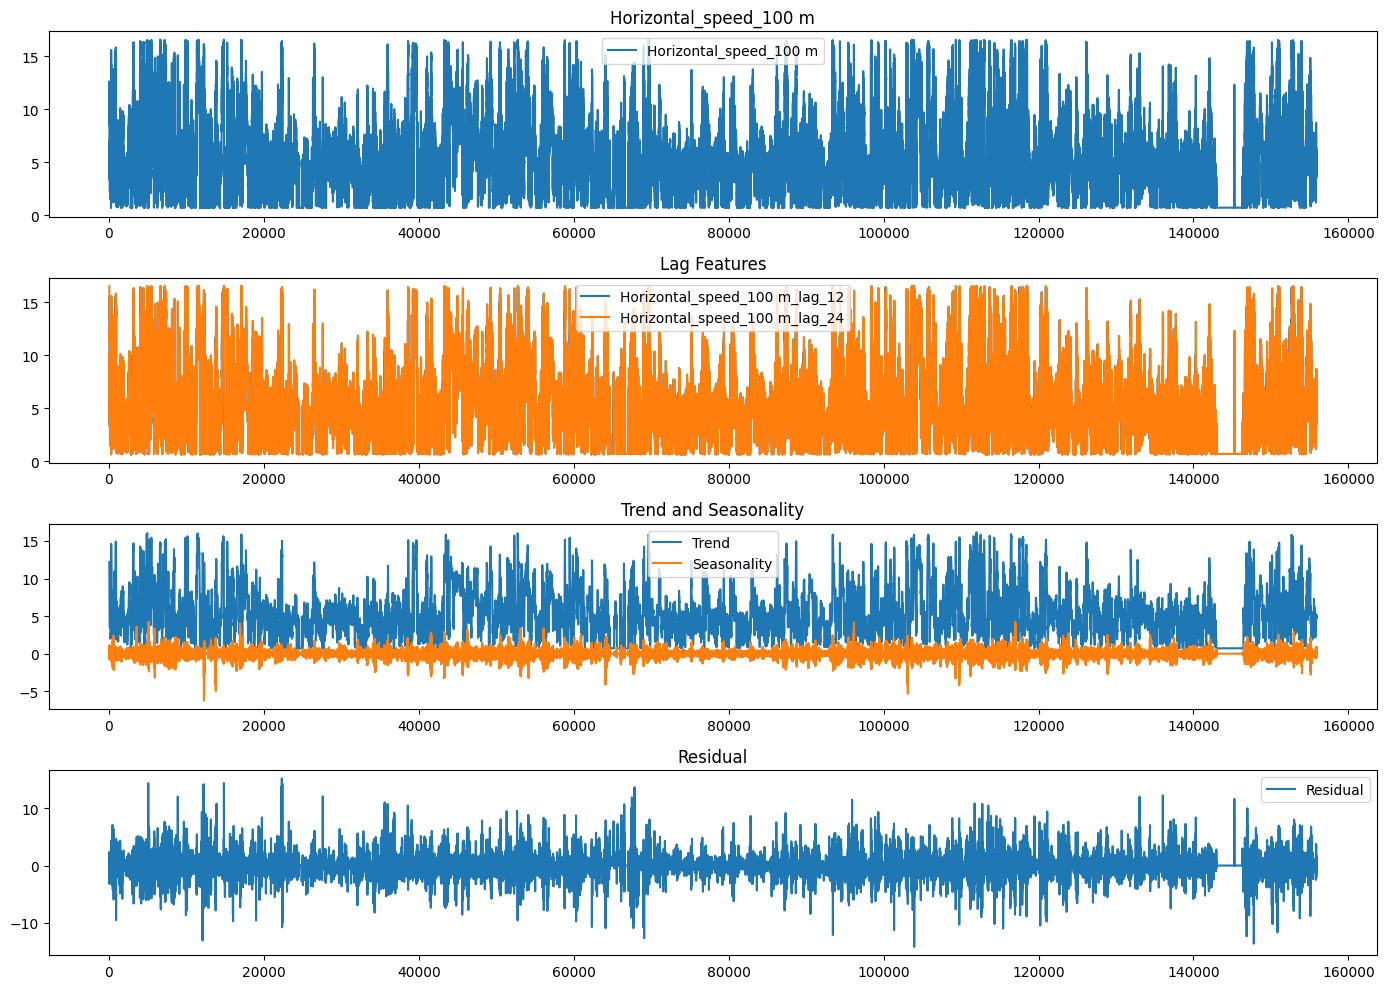

Processing feature: Horizontal_speed_80 m
ADF Statistic for Horizontal_speed_80 m: -25.315350829208537
p-value: 0.0
Critical Value (1%): -3.4303923978944004
Critical Value (5%): -2.8615587392776964
Critical Value (10%): -2.566779974249133


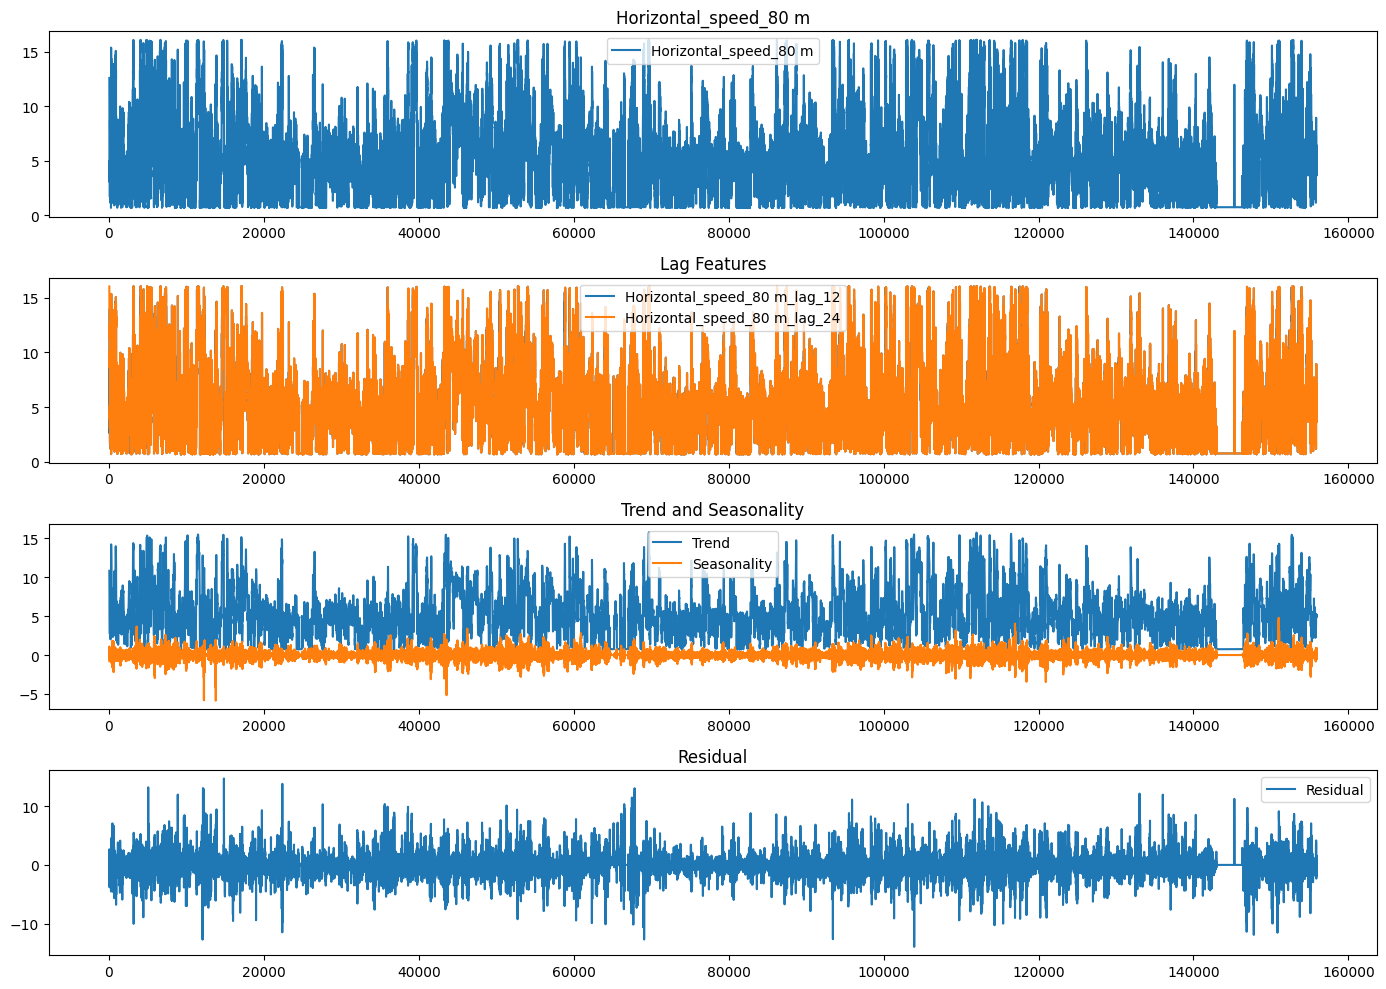

Processing feature: Horizontal_speed_60 m
ADF Statistic for Horizontal_speed_60 m: -25.876114666369705
p-value: 0.0
Critical Value (1%): -3.430392385802735
Critical Value (5%): -2.8615587339333874
Critical Value (10%): -2.566779971404541


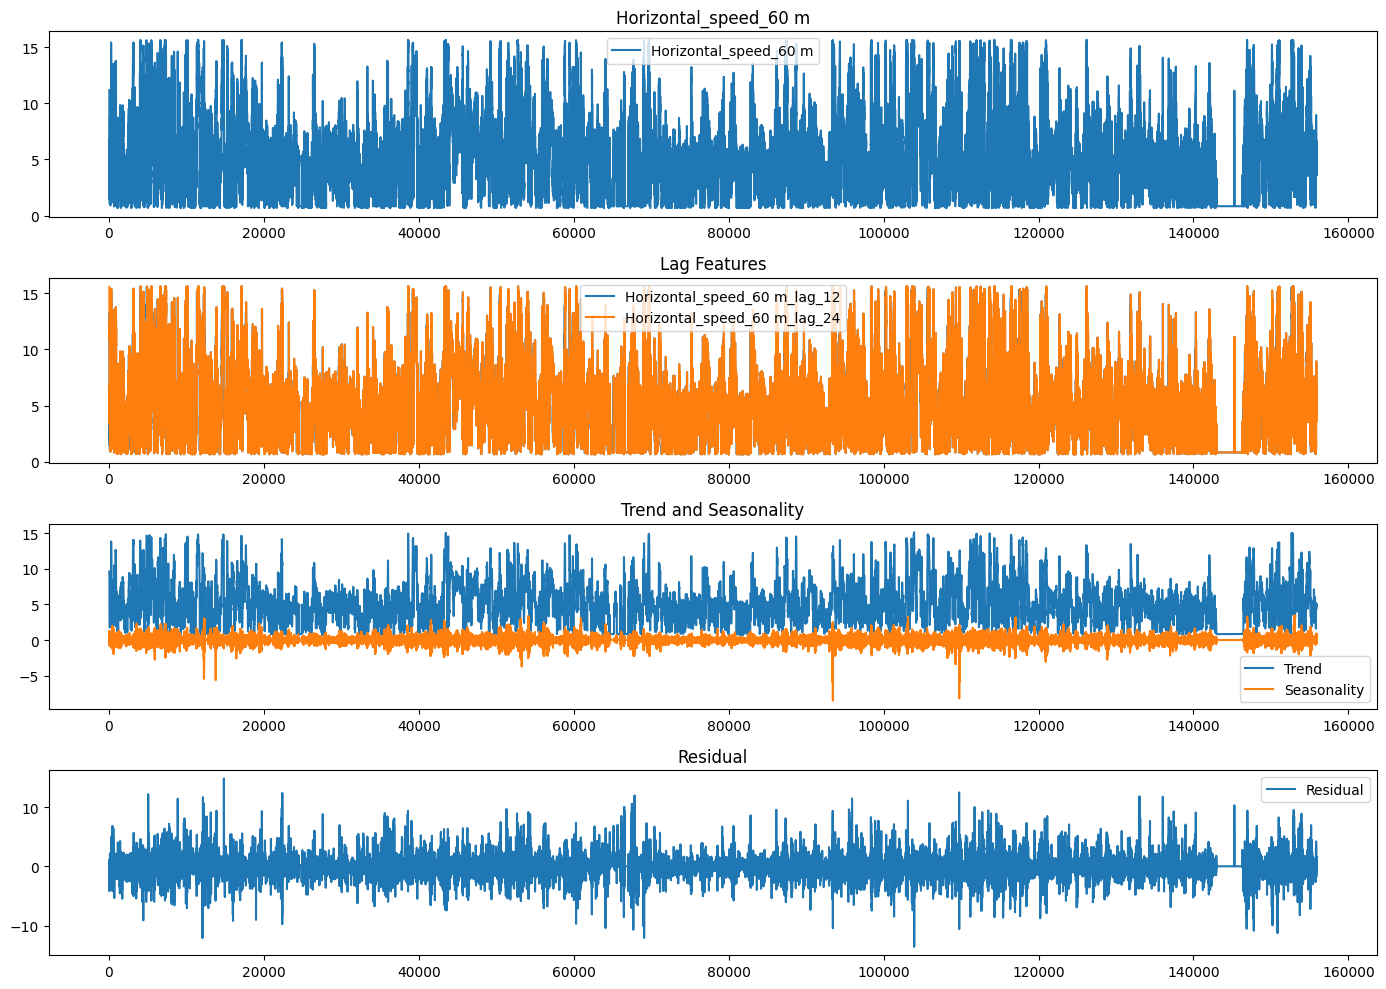

Processing feature: Horizontal_speed_20 m
ADF Statistic for Horizontal_speed_20 m: -36.523406424359074
p-value: 0.0
Critical Value (1%): -3.430392381956833
Critical Value (5%): -2.8615587322335645
Critical Value (10%): -2.566779970499784


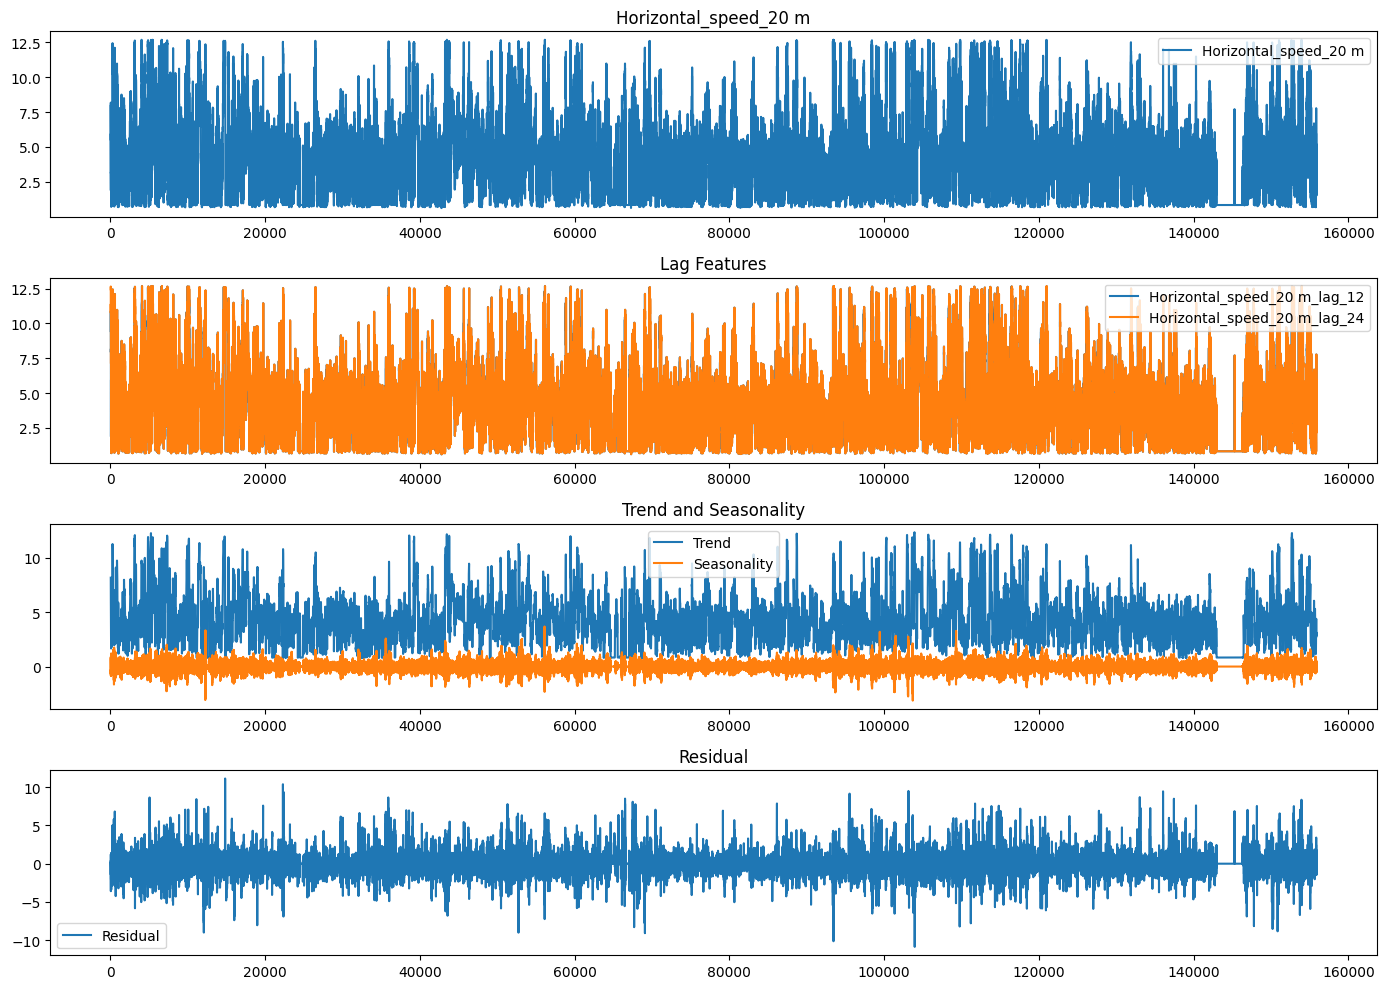

Processing feature: Horizontal_speed_10 m
ADF Statistic for Horizontal_speed_10 m: -36.9951577405262
p-value: 0.0
Critical Value (1%): -3.4303923814074757
Critical Value (5%): -2.861558731990758
Critical Value (10%): -2.566779970370546


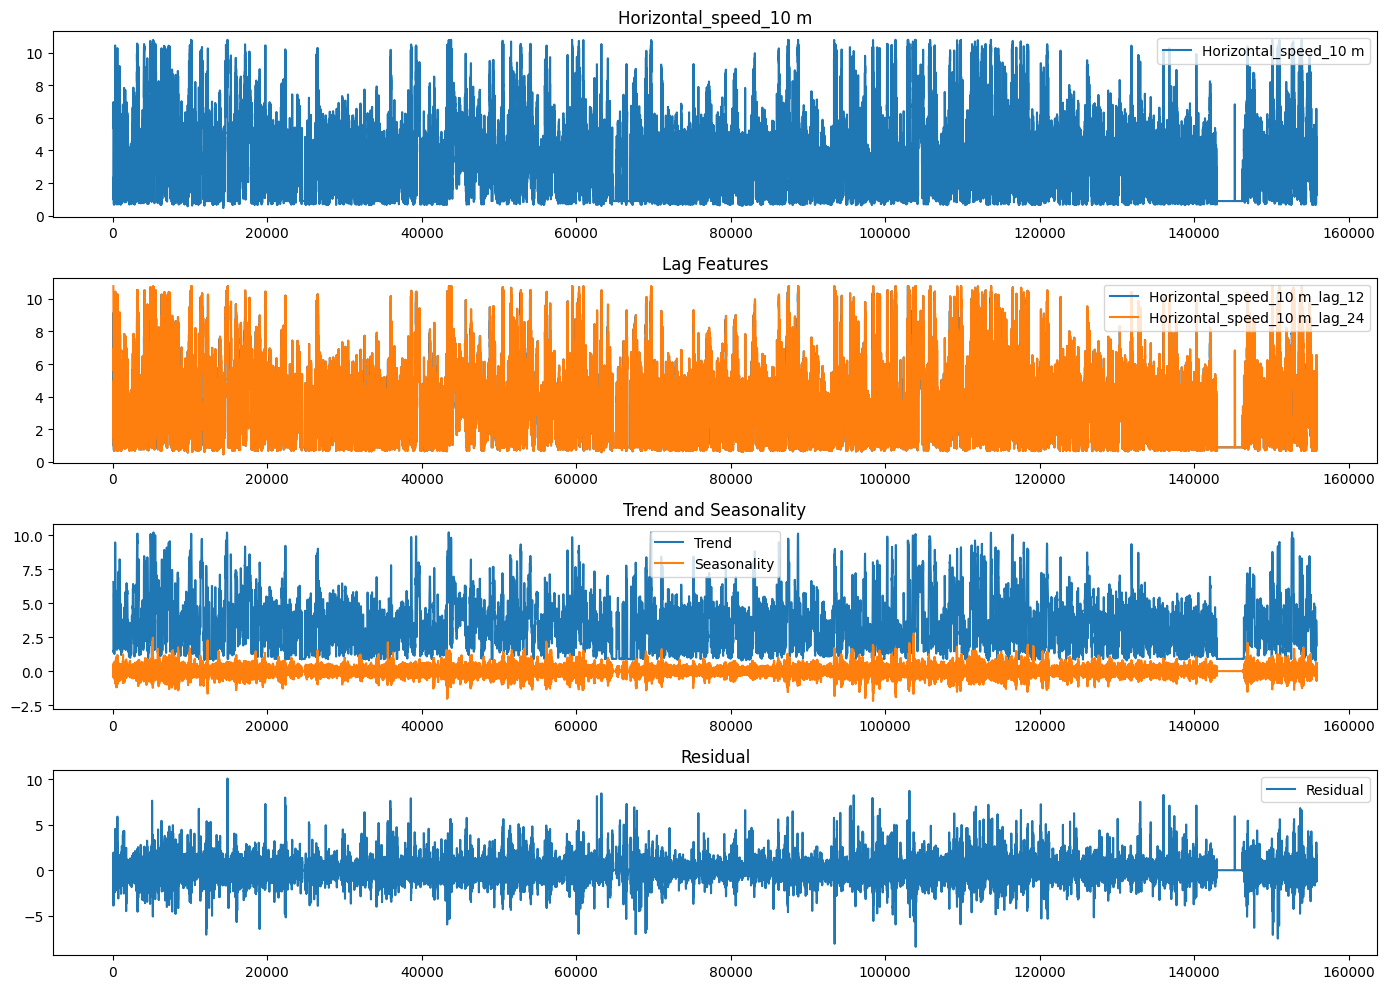

Processing feature: Horizontal_speed_38 m
ADF Statistic for Horizontal_speed_38 m: -25.68241926361295
p-value: 0.0
Critical Value (1%): -3.4303923995437984
Critical Value (5%): -2.861558740006702
Critical Value (10%): -2.5667799746371576


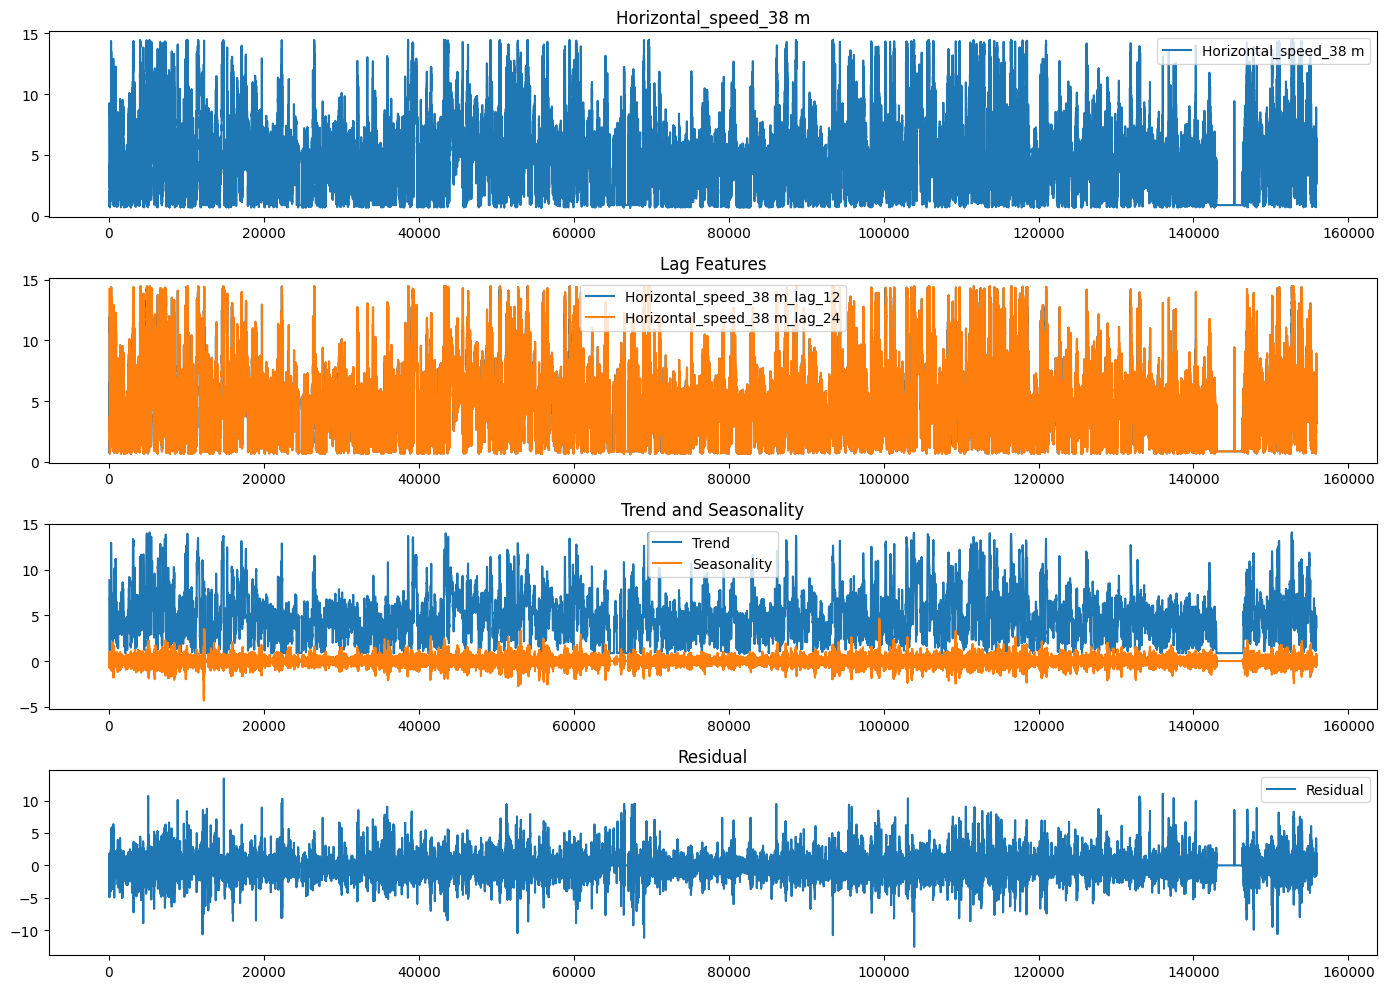

             Timestamp  air_temperature  air_temperature_std  air_pressure  \
56 2016-01-13 21:20:00            12.59             1.031813   1019.799988   
57 2016-01-13 21:30:00            12.85             1.035382   1019.799988   
58 2016-01-13 21:40:00            12.98             1.035969   1019.700012   
59 2016-01-13 21:50:00            13.13             1.033847   1019.799988   
60 2016-01-13 22:00:00            13.10             1.032008   1019.799988   

    air_pressure_std   humidity  humidity_std  height_1  \
56          1.189043  60.400002      3.083964       300   
57          1.209767  55.290001      3.060069       300   
58          1.225683  57.000000      3.034756       300   
59          1.242651  55.400002      3.011482       300   
60          1.257973  57.000000      2.987460       300   

    Horizontal_speed_300 m  h_1_horizontal_speed_std  ...  \
56               12.047784                  1.784057  ...   
57               12.004256                  1.870670  

In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.seasonal import STL
from verstack import NaNImputer  # Import NaNImputer as it was used previously
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# --- Load Data ---
# zephir_df = pd.read_csv('zephir_data.csv', parse_dates=['timestamp'], index_col='timestamp')

# --- Step 1: Sensor Fault Removal using Isolation Forest ---
def remove_outliers(df, feature_col):
    if df.empty:
        return df
    iso = IsolationForest(contamination=0.01, random_state=42)
    if feature_col not in df.columns:
        print(f"Warning: Feature column '{feature_col}' not found for outlier removal.")
        return df
    mask = iso.fit_predict(df[[feature_col]])
    return df[mask == 1]

# --- Step 2: Lag Features ---
def add_lag_features(df, feature_col, lags=[12]):
    if feature_col not in df.columns:
        print(f"Warning: Feature column '{feature_col}' not found for adding lag features.")
        return df
    for lag in lags:
        df[f'{feature_col}_lag_{lag}'] = df[feature_col].shift(lag)
    return df

# --- Step 3: STL Decomposition ---
def apply_stl(df, feature_col, period=12):
    if feature_col not in df.columns:
        print(f"Warning: Feature column '{feature_col}' not found for STL decomposition.")
        df[f'{feature_col}_trend'] = np.nan
        df[f'{feature_col}_seasonal'] = np.nan
        df[f'{feature_col}_resid'] = np.nan
        return df
    if df[feature_col].isna().all():
        df[f'{feature_col}_trend'] = np.nan
        df[f'{feature_col}_seasonal'] = np.nan
        df[f'{feature_col}_resid'] = np.nan
        return df
    stl = STL(df[feature_col], period=period, robust=True)
    result = stl.fit()
    df[f'{feature_col}_trend'] = result.trend
    df[f'{feature_col}_seasonal'] = result.seasonal
    df[f'{feature_col}_resid'] = result.resid
    return df

# --- Stationarity Test ---
def test_stationarity(df, feature_col):
    if feature_col not in df.columns:
        print(f"Warning: Feature column '{feature_col}' not found for stationarity test.")
        return
    result = adfuller(df[feature_col].dropna())
    print(f"ADF Statistic for {feature_col}: {result[0]}")
    print(f"p-value: {result[1]}")
    for key, value in result[4].items():
        print(f"Critical Value ({key}): {value}")

# --- Plotting Function ---
def plot_feature_components(df, feature_col, lags=[12]):
    plt.figure(figsize=(14, 10))

    plt.subplot(4, 1, 1)
    plt.plot(df[feature_col], label=feature_col)
    plt.title(f'{feature_col}')
    plt.legend()

    for i, lag in enumerate(lags):
        plt.subplot(4, 1, 2)
        lag_col = f'{feature_col}_lag_{lag}'
        if lag_col in df.columns:
            plt.plot(df[lag_col], label=lag_col)
    plt.title('Lag Features')
    plt.legend()

    plt.subplot(4, 1, 3)
    if f'{feature_col}_trend' in df.columns:
        plt.plot(df[f'{feature_col}_trend'], label='Trend')
    if f'{feature_col}_seasonal' in df.columns:
        plt.plot(df[f'{feature_col}_seasonal'], label='Seasonality')
    plt.title('Trend and Seasonality')
    plt.legend()

    plt.subplot(4, 1, 4)
    if f'{feature_col}_resid' in df.columns:
        plt.plot(df[f'{feature_col}_resid'], label='Residual')
    plt.title('Residual')
    plt.legend()

    plt.tight_layout()
    plt.show()

# --- Master Pipeline ---
def preprocess_zephir(zephir_df, feature_cols=['wind_speed'], lags=[12], stl_period=12):
    if zephir_df.empty:
        raise ValueError("Input DataFrame is empty.")

    processed_dfs = {}

    for feature_col in feature_cols:
        print(f"Processing feature: {feature_col}")
        current_df = zephir_df.copy()

        clean_df = remove_outliers(current_df, feature_col)
        if clean_df.empty:
            print(f"Warning: All data removed as outliers for feature: {feature_col}. Skipping.")
            continue

        fe_df = add_lag_features(clean_df, feature_col, lags)
        fe_df = apply_stl(fe_df, feature_col, period=stl_period)

        subset_cols = [feature_col] + [f'{feature_col}_lag_{lag}' for lag in lags] + [f'{feature_col}_trend', f'{feature_col}_seasonal', f'{feature_col}_resid']
        subset_cols = [col for col in subset_cols if col in fe_df.columns]

        fe_df.dropna(subset=subset_cols, inplace=True)
        if fe_df.empty:
            print(f"Warning: No data left after dropping NaNs for feature: {feature_col}. Skipping.")
            continue

        processed_dfs[feature_col] = fe_df

        test_stationarity(fe_df, feature_col)
        plot_feature_components(fe_df, feature_col, lags)

    return processed_dfs

# Example usage:
wind_speed_columns = [
    'Horizontal_speed_300 m',
    'Horizontal_speed_250 m',
    'Horizontal_speed_200 m',
    'Horizontal_speed_150 m',
    'Horizontal_speed_120 m',
    'Horizontal_speed_100 m',
    'Horizontal_speed_80 m',
    'Horizontal_speed_60 m',
    'Horizontal_speed_20 m',
    'Horizontal_speed_10 m',
    'Horizontal_speed_38 m'
]

processed_data = preprocess_zephir(zephir_df, feature_cols=wind_speed_columns, lags=[12, 24], stl_period=12)

if 'Horizontal_speed_100 m' in processed_data:
    processed_df_100m = processed_data['Horizontal_speed_100 m']
    print(processed_df_100m.head())
else:
    print("Processing failed for 'Horizontal_speed_100 m'.")